# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [187]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [188]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [189]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [190]:
# Create a Beautiful Soup Object
html = browser.html
mars_weather_soup = soup(html, 'html.parser')

In [191]:
# Extract all rows of data
# inspected element showed <table class="table">
# find the table ref 11.6.2
table_elements = mars_weather_soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [192]:
# Create an empty list
results_list = []
# Loop through the scraped data to create a list of rows
# ref to 11.6.2
mars_weather = {}
rows = table_elements.find_all('tr')
for r in rows:
    row_heading = row.find('th')
    row_data = row.find('td')
# removed '.text': showed an error that
#'NoneType' does not have text attributes
    mars_weather[row_heading] = row_data

In [193]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# creates a new DataFrame from the Mars Temp Data html table 
# ref 11.6.2
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [194]:
# Confirm DataFrame was created successfully
# selects first table by using index[0]
weather_df = df[0]
weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [195]:
# Examine data type of each column
weather_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [196]:
# Change data types for data analysis
# according to original starter code output, using .astype()
# need to convert terrestrial_date to datetime64[ns] & id to object 
weather_df['terrestrial_date'] = weather_df['terrestrial_date'].astype('datetime64[ns]')
weather_df['id'] = weather_df['id'].astype(object)


In [197]:
# Confirm type changes were successful by examining data types again
weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [198]:
# 1. How many months are there on Mars?
# tried groupby(), grouped the dataframe by month, 
# shows months 1-12 in first column
# ref 4.6.2 
month_df = weather_df.groupby("month").count()
month_df

,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
1,174,174,174,174,174,174
2,178,178,178,178,178,178
3,192,192,192,192,192,192
4,194,194,194,194,194,194
5,149,149,149,149,149,149
6,147,147,147,147,147,147
7,142,142,142,142,142,142
8,141,141,141,141,141,141
9,134,134,134,134,134,134


In [199]:
# 2. How many Martian days' worth of data are there?
# in ref to challenge instructions: 
# sol is the number of elapsed sols (Martian days) since Curiosity landed on Mars
weather_df['sol'].count()

1867

In [200]:
# 3. What is the average low temperature by month?
# square brackets to reference a variable in the df 
# ref Mod 4.6.2-4.6.3
weather_temp = weather_df['min_temp'].groupby(weather_df['month'])
# ref Mod 4.4.2
weather_temp.mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Temperature in Celsius')

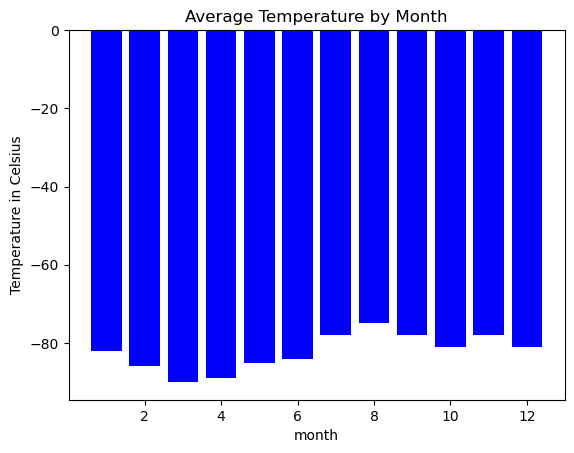

In [201]:
# Plot the average temperature by month
# ref 5.1.5.
x_axis = weather_df['month']
y_axis = weather_df['min_temp']
plt.bar(x_axis, y_axis, color='b')
plt.title("Average Temperature by Month")
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")


In [202]:
# Identify the coldest and hottest months in Curiosity's location

weather2_temp = weather_df['min_temp'].groupby(weather_df['month']).mean()
weather_temp2 = weather2_temp.min()
weather_temp2 

# the min temp is -83.307292 which corresponds to the month of March 
# 3    -83.307292
# the max temp is -68.382979 which corresponds to the month of August 
# 8    -68.382979

-83.30729166666667

In [203]:
weather_temp3 = weather2_temp.max()
weather_temp3

-68.38297872340425

In [206]:
# 4. Average pressure by Martian month
pressure_temp = weather_df['pressure'].groupby(weather_df['month'])
pressure_temp.mean()

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

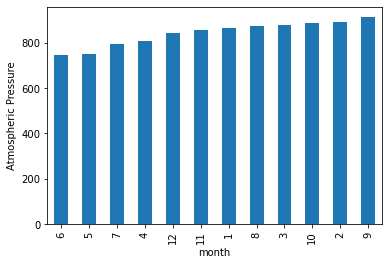

In [30]:
# Plot the average pressure by month


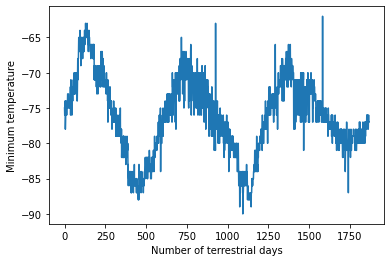

In [31]:
# 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [140]:
# Write the data to a CSV
output_data_file = "mars_weather_data.csv" 

weather_df.to_csv(output_data_file, encoding = 'utf8') 

In [205]:
browser.quit()